# 机器学习算法一览，应用建议与解决思路 

作者：寒小阳
时间：2016年1月。
出处：http://blog.csdn.net/han_xiaoyang/article/details/50469334
声明：版权所有，转载请联系作者并注明出处

![][csdn]

[csdn]: http://imgtech.gmw.cn/attachement/jpg/site2/20111223/f04da22d7ba7105e1d7507.jpg 

![CSDN图标][csdn]

[csdn]: http://7xo0y8.com1.z0.glb.clouddn.com/ml_conceptml_algorithms.png "这是CSDN的图标"

## 1.1从机器学习问题角度分类

我们先从机器学习问题本身分类的角度来看，我们可以分成下列类型的算法：
***
* 监督学习算法

>机器学习中有一大部分的问题属于『监督学习』的范畴，简单口语化地说明，这类问题中，给定的训练样本中，每个样本的输入x都对应一个确定的结果y，我们需要训练出一个模型(数学上看是一个x→y的映射关系f)，在未知的样本x′给定后，我们能对结果y′做出预测。

>这里的预测结果如果是**离散值**(很多时候是类别类型，比如邮件分类问题中的垃圾邮件/普通邮件，比如用户会/不会购买某商品)，那么我们把它叫做分类问题(classification problem)；如果预测结果是**连续值**(比如房价，股票价格等等)，那么我们把它叫做回归问题(regression problem)。

>有一系列的机器学习算法是用以解决监督学习问题的，比如最经典的用于分类问题的朴素贝叶斯、逻辑回归、支持向量机等等；比如说用于回归问题的线性回归等等。
***

* 无监督学习

>有另外一类问题，给我们的样本并没有给出『标签/标准答案』，就是一系列的样本。而我们需要做的事情是，在一些样本中抽取出通用的规则。这叫做『无监督学习』。包括关联规则和聚类算法在内的一系列机器学习算法都属于这个范畴。
***

* 半监督学习

>这类问题给出的训练数据，有一部分有标签，有一部分没有标签。我们想学习出数据组织结构的同时，也能做相应的预测。此类问题相对应的机器学习算法有自训练(Self-Training)、直推学习(Transductive Learning)、生成式模型(Generative Model)等。


## 1.2从算法的功能角度分类
我们也可以从算法的共性(比如功能，运作方式)角度对机器学习算法分类。下面我们根据算法的共性去对它们归个类。不过需要注意的是，我们下面的归类方法可能对分类和回归有比较强的倾向性，而这两类问题也是最常遇到的。
* 回归算法(Regression Algorithms)
>回归算法是一种通过最小化预测值与实际结果值之间的差距，而得到输入特征之间的最佳组合方式的一类算法。对于连续值预测有线性回归等，而对于离散值/类别预测，我们也可以把逻辑回归等也视作回归算法的一种，常见的回归算法如下：


>   * Ordinary Least Squares Regression (OLSR)
>   * Linear Regression
>   * Logistic Regression
>   * Stepwise Regression
>   * Locally Estimated Scatterplot Smoothing (LOESS)
>   * Multivariate Adaptive Regression Splines (MARS)


## 2.机器学习算法使用图谱

![CSDN图标][csdn]

[csdn]: http://7xo0y8.com1.z0.glb.clouddn.com/ml_conceptsklearn_ml_cheat_sheet.png "这是CSDN的图标"

首先样本量如果非常少的话，其实所有的机器学习算法都没有办法从里面『学到』通用的规则和模式，so多弄点数据是王道。然后根据问题是有/无监督学习和连续值/离散值预测，分成了分类、聚类、回归和维度约减四个方法类，每个类里根据具体情况的不同，又有不同的处理方法。

# 3.机器学习问题解决思路
上面带着代价走马观花过了一遍机器学习的若干算法，下面我们试着总结总结在拿到一个实际问题的时候，如果着手使用机器学习算法去解决问题，其中的一些注意点以及核心思路。主要包括以下内容：

> 
   * 拿到数据后怎么了解数据(可视化)
   * 选择最贴切的机器学习算法
   * 定位模型状态(过/欠拟合)以及解决方法
   * 大量极的数据的特征分析与可视化
   * 各种损失函数(loss function)的优缺点及如何选择

多说一句，这里写的这个小教程，主要是作为一个通用的建议和指导方案，你不一定要严格按照这个流程解决机器学习问题。

## 3.1 数据与可视化

我们先使用scikit-learn的make_classification函数来生产一份分类数据，然后模拟一下拿到实际数据后我们需要做的事情。

In [13]:
#numpy科学计算工具箱
import numpy as np
#使用make_classification构造1000个样本，每个样本有20个feature
from sklearn.datasets import make_classification
X, y = make_classification(1000, n_features=20, n_informative=2, 
                           n_redundant=2, n_classes=2, random_state=0)
#存为dataframe格式
from pandas import DataFrame
df = DataFrame(np.hstack((X, y[:, None])),columns = range(20) + ["class"])

我们生成了一份包含1000个分类数据样本的数据集，每个样本有20个数值特征。同时我们把数据存储至pandas中的DataFrame数据结构中。我们取前几行的数据看一眼：

In [14]:
df[:6]

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,class
0,-1.063780,0.676409,1.069356,-0.217580,0.460215,-0.399167,-0.079188,1.209385,-0.785315,-0.172186,...,-0.993119,0.306935,0.064058,-1.054233,-0.527496,-0.074183,-0.355628,1.057214,-0.902592,0
1,0.070848,-1.695281,2.449449,-0.530494,-0.932962,2.865204,2.435729,-1.618500,1.300717,0.348402,...,0.225324,0.605563,-0.192101,-0.068027,0.971681,-1.792048,0.017083,-0.375669,-0.623236,1
2,0.940284,-0.492146,0.677956,-0.227754,1.401753,1.231653,-0.777464,0.015616,1.331713,1.084773,...,-0.050120,0.948386,-0.173428,-0.477672,0.760896,1.001158,-0.069464,1.359046,-1.189590,1
3,-0.299517,0.759890,0.182803,-1.550233,0.338218,0.363241,-2.100525,-0.438068,-0.166393,-0.340835,...,1.178724,2.831480,0.142414,-0.202819,2.405715,0.313305,0.404356,-0.287546,-2.847803,1
4,-2.630627,0.231034,0.042463,0.478851,1.546742,1.637956,-1.532072,-0.734445,0.465855,0.473836,...,-1.061194,-0.888880,1.238409,-0.572829,-1.275339,1.003007,-0.477128,0.098536,0.527804,0
5,-0.262645,0.327590,0.997845,-1.577903,-0.828981,-0.202735,0.825932,-0.489252,0.849912,-0.035563,...,0.935624,1.741002,1.930498,0.069474,-0.643267,-0.257866,0.260081,-0.001670,-1.639319,1


不幸的是，肉眼看数据，尤其是维度稍微高点的时候，很有可能看花了也看不出看不出任何线索。幸运的是，我们对于图像的理解力，比数字好太多，而又有相当多的工具可以帮助我们『可视化』数据分布。

>** 我们在处理任何数据相关的问题时，了解数据都是很有必要的，而可视化可以帮助我们更好地直观理解数据的分布和特性** 

数据的可视化有很多工具包可以用，比如下面我们用来做数据可视化的工具包Seaborn。最简单的可视化就是数据散列分布图和柱状图，这个可以用Seanborn的pairplot来完成。以下图中2种颜色表示2种不同的类，因为20维的可视化没有办法在平面表示，我们取出了一部分维度，两两组成pair看数据在这2个维度平面上的分布状况，代码和结果如下：

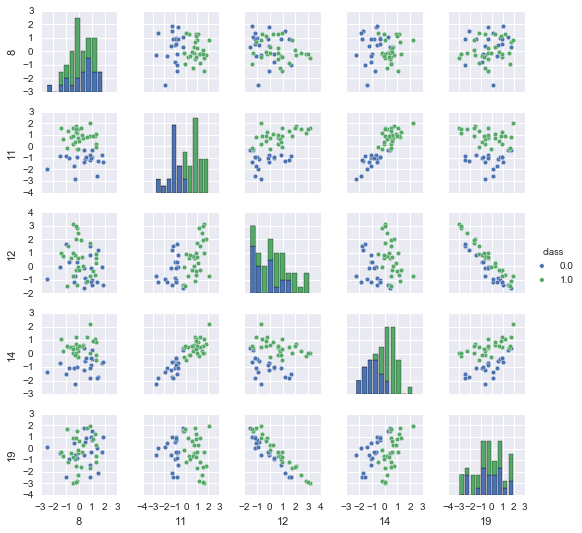

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#使用pairplot去看不同特征维度pair下数据的空间分布状况
_ = sns.pairplot(df[:50], vars=[8, 11, 12, 14, 19], hue="class", size=1.5)
plt.show()

我们从散列图和柱状图上可以看出，确实有些维度的特征相对其他维度，有更好的区分度，比如第11维和14维看起来很有区分度。这两个维度上看，数据点是近似线性可分的。而12维和19维似乎呈现出了很高的负相关性。接下来我们用Seanborn中的corrplot来计算计算各维度特征之间(以及最后的类别)的相关性。代码和结果图如下：

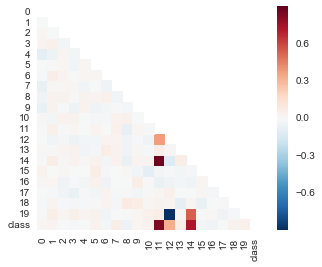

In [16]:

# Compute the correlation matrix
corr = df.corr()   

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
   ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

相关性图很好地印证了我们之前的想法，可以看到第11维特征和第14维特征和类别有极强的相关性，同时它们俩之间也有极高的相关性。而第12维特征和第19维特征却呈现出极强的负相关性。强相关的特征其实包含了一些冗余的特征，而除掉上图中颜色较深的特征，其余特征包含的信息量就没有这么大了，它们和最后的类别相关度不高，甚至各自之间也没什么先惯性。

插一句，这里的维度只有20，所以这个相关度计算并不费太大力气，然而实际情形中，你完全有可能有远高于这个数字的特征维度，同时样本量也可能多很多，那种情形下我们可能要先做一些处理，再来实现可视化了。别着急，一会儿我们会讲到。

## 3.2 机器学习算法选择

数据的情况我们大致看了一眼，确定一些特征维度之后，我们可以考虑先选用机器学习算法做一个baseline的系统出来了。
>这里我们继续参照上面提到过的机器学习算法使用图谱。
我们只有1000个数据样本，是分类问题，同时是一个有监督学习，因此我们根据图谱里教的方法，使用LinearSVC(support vector classification with linear kernel)试试。

>注意，LinearSVC需要选择正则化方法以缓解过拟合问题；我们这里选择使用最多的L2正则化，并把惩罚系数C设为10。我们改写一下sklearn中的学习曲线绘制函数，画出训练集和交叉验证集上的得分：

d:\anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
d:\anaconda2\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


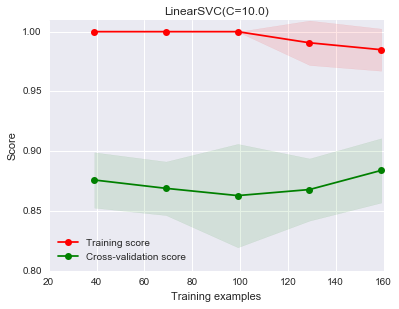

In [17]:
from sklearn.svm import LinearSVC
from sklearn.learning_curve import learning_curve
#绘制学习曲线，以确定模型的状况
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    """

    plt.figure(figsize=[6.0, 4.5])
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid("on") 
    if ylim:
        plt.ylim(ylim)
    plt.title(title)
    plt.show()

#少样本的情况情况下绘出学习曲线
plot_learning_curve(LinearSVC(C=10.0), "LinearSVC(C=10.0)",
                    X, y, ylim=(0.8, 1.01),
                    train_sizes=np.linspace(.05, 0.2, 5))

### 模型评估：过拟合 OR 欠拟合
这幅图上，我们发现随着样本量的增加，训练集上的得分有一定程度的下降，交叉验证集上的得分有一定程度的上升，但总体说来，两者之间有很大的差距，训练集上的准确度远高于交叉验证集。这其实意味着我们的模型处于过拟合的状态，也即模型太努力地刻画训练集，一不小心把很多噪声的分布也拟合上了，导致在新数据上的泛化能力变差了。

### 过拟合的定位与解决
>**
问题来了，过拟合咋办？
针对过拟合，有几种办法可以处理：**
* 1 .  增大样本量

这个比较好理解吧，过拟合的主要原因是模型太努力地去记住训练样本的分布状况，而加大样本量，可以使得训练集的分布更加具备普适性，噪声对整体的影响下降。恩，我们提高点样本量试试：

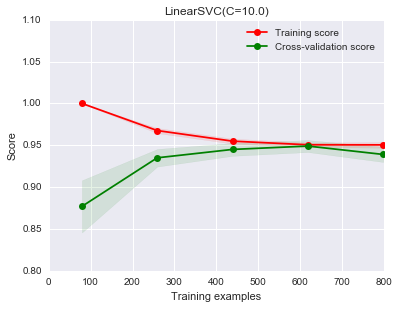

In [18]:
#增大一些样本量
plot_learning_curve(LinearSVC(C=10.0), "LinearSVC(C=10.0)",
                    X, y, ylim=(0.8, 1.1),
                    train_sizes=np.linspace(.1, 1.0, 5))

是不是发现问题好了很多？
>** 随着我们增大训练样本量，我们发现训练集和交叉验证集上的得分差距在减少，最后它们已经非常接近了。** 

增大样本量，最直接的方法当然是想办法去采集相同场景下的新数据，如果实在做不到，也可以试试在已有数据的基础上做一些人工的处理生成新数据(比如图像识别中，我们可能可以对图片做镜像变换、旋转等等)，当然，这样做一定要谨慎，强烈建议想办法采集真实数据。

>**针对过拟合：**

>* 2.减少特征的量(只用我们觉得有效的特征)

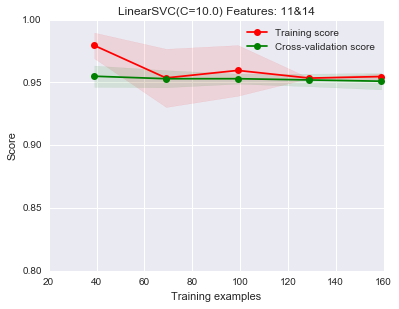

In [19]:
plot_learning_curve(LinearSVC(C=10.0), "LinearSVC(C=10.0) Features: 11&14", X[:, [11, 14]], y, ylim=(0.8, 1.0), train_sizes=np.linspace(.05, 0.2, 5))

从上图上可以看出，过拟合问题也得到一定程度的缓解。不过我们这是自己观察后，手动选出11和14维特征。那能不能自动进行特征组合和选择呢，其实我们当然可以遍历特征的组合样式，然后再进行特征选择(前提依旧是这里特征的维度不高，如果高的话，遍历所有的组合是一个非常非常非常耗时的过程！！)：

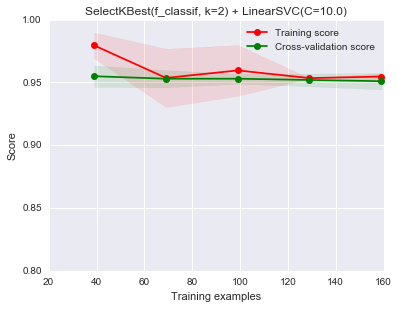

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
# SelectKBest(f_classif, k=2) 会根据Anova F-value选出 最好的k=2个特征

plot_learning_curve(Pipeline([("fs", SelectKBest(f_classif, k=2)), # select two features
                               ("svc", LinearSVC(C=10.0))]), "SelectKBest(f_classif, k=2) + LinearSVC(C=10.0)", X, y, ylim=(0.8, 1.0), train_sizes=np.linspace(.05, 0.2, 5))

如果你自己跑一下程序，会发现在我们自己手造的这份数据集上，这个特征筛选的过程超级顺利，但依旧像我们之前提过的一样，这是因为特征的维度不太高。
从另外一个角度看，
>我们之所以做特征选择，是想降低模型的复杂度，而更不容易刻画到噪声数据的分布。

从这个角度出发，我们还可以有
* (1)多项式你和模型中降低多项式次数 
* (2)神经网络中减少神经网络的层数和每层的结点数 
* (3)SVM中增加RBF-kernel的bandwidth等方式来降低模型的复杂度。

话说回来，即使以上提到的办法降低模型复杂度后，好像能在一定程度上缓解过拟合



** 但是我们一般还是不建议用降低模型复杂度的方法处理过拟合的问题，优先用下面的方法：**
>**针对过拟合：**

>* 3.增强正则化作用(比如说这里是减小LinearSVC中的C参数)

正则化是我认为在**不损失信息**的情况下，最有效的缓解过拟合现象的方法。


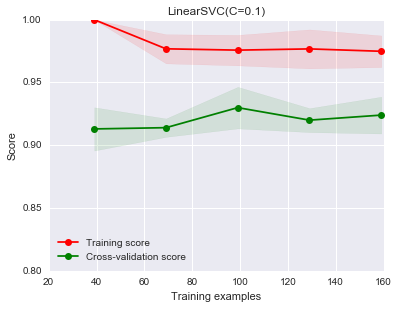

In [21]:
plot_learning_curve(LinearSVC(C=0.1), "LinearSVC(C=0.1)", X, y, ylim=(0.8, 1.0), train_sizes=np.linspace(.05, 0.2, 5))

调整正则化系数后，发现确实过拟合现象有一定程度的缓解.
我们现在的系数是自己敲定的，有没有办法可以自动选择最佳的这个参数呢？可以。我们可以在交叉验证集上做grid-search查找最好的正则化系数(对于大数据样本，我们依旧需要考虑时间问题，这个过程可能会比较慢):

d:\anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


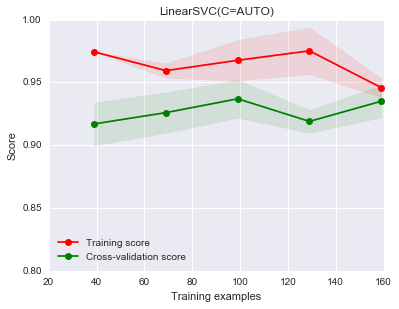

Chosen parameter on 500 datapoints: {'C': 0.001}


In [22]:
from sklearn.grid_search import GridSearchCV
estm = GridSearchCV(LinearSVC(), 
                   param_grid={"C": [0.001, 0.01, 0.1, 1.0, 10.0]})
plot_learning_curve(estm, "LinearSVC(C=AUTO)", 
                    X, y, ylim=(0.8, 1.0),
                    train_sizes=np.linspace(.05, 0.2, 5))
print "Chosen parameter on 500 datapoints: %s" % estm.fit(X[:500], y[:500]).best_params_

对于特征选择的部分，我打算多说几句，我们刚才看过了用sklearn.feature_selection中的SelectKBest来选择特征的过程，也提到了在高维特征的情况下，这个过程可能会非常非常慢。那我们有别的办法可以进行特征选择吗？比如说，我们的分类器自己能否甄别那些特征是对最后的结果有益的？这里有个实际工作中用到的小技巧。

我们知道：
> l2正则化，它对于最后的特征权重的影响是，尽量打散权重到每个特征维度上，不让权重集中在某些维度上，出现权重特别高的特征。
    而l1正则化，它对于最后的特征权重的影响是，让特征获得的权重稀疏化，也就是对结果影响不那么大的特征，干脆就拿不着权重。

** 那基于这个理论，我们可以把SVC中的正则化替换成 L1正则化，让其自动甄别哪些特征应该留下权重。**

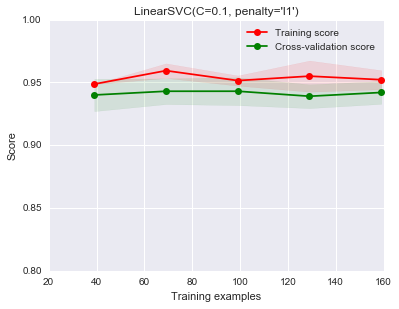

In [23]:
plot_learning_curve(LinearSVC(C=0.1, penalty='l1', dual=False),  "LinearSVC(C=0.1, penalty='l1')", X, y, ylim=(0.8, 1.0), train_sizes=np.linspace(.05, 0.2, 5))

好了，我们一起来看看最后特征获得的权重：

In [24]:
estm = LinearSVC(C=0.1, penalty='l1', dual=False)
estm.fit(X[:450], y[:450])  # 用450个点来训练
print "Coefficients learned: %s" % estm.coef_
print "Non-zero coefficients: %s" % np.nonzero(estm.coef_)[1]

Coefficients learned: [[  0.00000000e+00   0.00000000e+00   0.00000000e+00  -3.22357245e-02
   -1.66081579e-02   4.41129046e-03  -4.32394976e-02   3.85096126e-02
    0.00000000e+00   0.00000000e+00   6.27281906e-02   1.22236109e+00
    1.18916761e-01  -9.42485609e-04   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   9.27638582e-02   0.00000000e+00]]
Non-zero coefficients: [ 3  4  5  6  7 10 11 12 13 18]


### 欠拟合定位与解决

我们再随机生成一份数据[1000*20]的数据(但是分布和之前有变化)，重新使用LinearSVC来做分类。

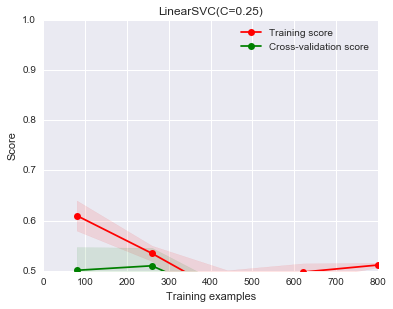

In [25]:
#构造一份环形数据
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=2)
#绘出学习曲线
plot_learning_curve(LinearSVC(C=0.25),"LinearSVC(C=0.25)",X, y, ylim=(0.5, 1.0),train_sizes=np.linspace(.1, 1.0, 5))

简直烂出翔了有木有，二分类问题，我们做随机猜测，准确率都有0.5，这比随机猜测都高不了多少！！！怎么办？

>不要盲目动手收集更多资料，或者调整正则化参数。我们从学习曲线上其实可以看出来，训练集上的准确度和交叉验证集上的准确度都很低，这其实就对应了我们说的『欠拟合』状态。别急，我们回到我们的数据，还是可视化看看：

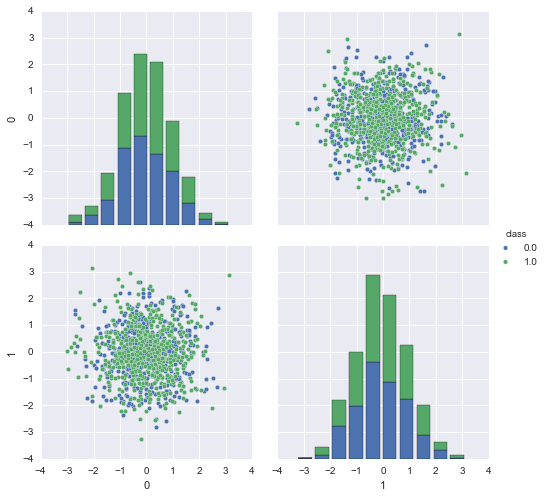

In [26]:
f = DataFrame(np.hstack((X, y[:, None])), columns = range(2) + ["class"])
_ = sns.pairplot(df, vars=[0, 1], hue="class", size=3.5)

你发现什么了，**数据根本就没办法线性分割！！！，所以你再找更多的数据，或者调整正则化参数，都是无济于事的！！！**

>那我们又怎么解决欠拟合问题呢？通常有下面一些方法：

>* 1.调整你的特征(找更有效的特征！！) 

比如说我们观察完现在的数据分布，然后我们先对数据做个映射：

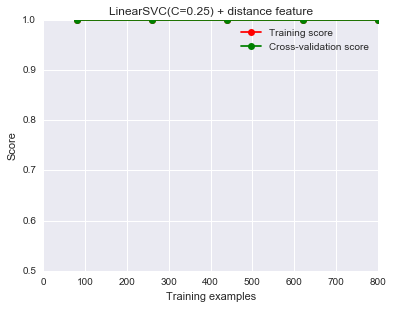

In [27]:
# 加入原始特征的平方项作为新特征
X_extra = np.hstack((X, X[:, [0]]**2 + X[:, [1]]**2))

plot_learning_curve(LinearSVC(C=0.25), "LinearSVC(C=0.25) + distance feature", X_extra, y, ylim=(0.5, 1.0), train_sizes=np.linspace(.1, 1.0, 5))

卧槽，少年，这准确率，被吓尿了有木有啊！！！所以你看，选用的特征影响太大了，当然，我们这里是人工模拟出来的数据，分布太明显了，实际数据上，会比这个麻烦一些，但是在特征上面下的功夫还是很有回报的。

>**针对欠拟合：**

>* 2.使用更复杂一点的模型(比如说用非线性的核函数)

我们对模型稍微调整了一下，用了一个复杂一些的非线性rbf kernel：

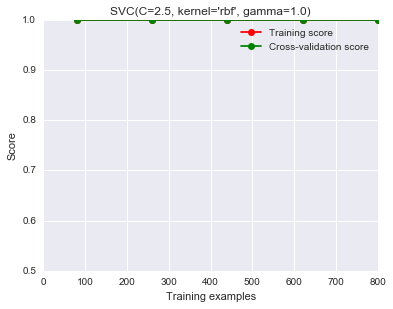

In [28]:
from sklearn.svm import SVC
# note: we use the original X without the extra feature
plot_learning_curve(SVC(C=2.5, kernel="rbf", gamma=1.0), "SVC(C=2.5, kernel='rbf', gamma=1.0)",X, y, ylim=(0.5, 1.0), train_sizes=np.linspace(.1, 1.0, 5))

你看，效果依旧很赞。

## 3.3 关于大数据样本集和高维特征空间

我们在小样本的toy dataset上，怎么捣鼓都有好的方法。但是当数据量和特征样本空间膨胀非常厉害时，很多东西就没有那么好使了，至少是一个很耗时的过程。举个例子说，我们现在重新生成一份数据集，但是这次，我们生成更多的数据，更高的特征维度，而分类的类别也提高到5。

## 3.3.1 大数据情形下的模型选择与学习曲线

在上面提到的那样一份数据上，我们用LinearSVC可能就会有点慢了，我们注意到机器学习算法使用图谱推荐我们使用**SGDClassifier**。其实本质上说，这个模型也是一个线性核函数的模型，不同的地方是，它使用了**随机梯度下降做训练**，所以每次并没有使用全部的样本，收敛速度会快很多。再多提一点，SGDClassifier对于特征的幅度非常敏感，也就是说，我们在把数据灌给它之前，应该先对特征做幅度调整，当然，用sklearn的StandardScaler可以很方便地完成这一点。

SGDClassifier每次只使用一部分(mini-batch)做训练，在这种情况下，我们使用交叉验证(cross-validation)并不是很合适，我们会使用相对应的progressive validation：简单解释一下，estimator每次只会拿下一个待训练batch在本次做评估，然后训练完之后，再在这个batch上做一次评估，看看是否有优化。

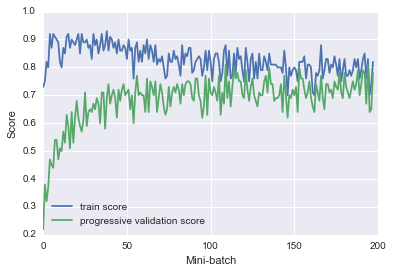

In [29]:
#生成大样本，高纬度特征数据
X, y = make_classification(20000, n_features=200, n_informative=25, n_redundant=0, n_classes=10, class_sep=2, random_state=0)

#用SGDClassifier做训练，并画出batch在训练前后的得分差
from sklearn.linear_model import SGDClassifier
est = SGDClassifier(penalty="l2", alpha=0.001)
progressive_validation_score = []
train_score = []
for datapoint in range(0, 19900, 100):
    X_batch = X[datapoint:datapoint+100]
    y_batch = y[datapoint:datapoint+100]
    if datapoint > 0:
        progressive_validation_score.append(est.score(X_batch, y_batch))
    est.partial_fit(X_batch, y_batch, classes=range(10))
    if datapoint > 0:
        train_score.append(est.score(X_batch, y_batch))

plt.plot(train_score, label="train score")
plt.plot(progressive_validation_score, label="progressive validation score")
plt.xlabel("Mini-batch")
plt.ylabel("Score")
plt.legend(loc='best')  
plt.show()          

从这个图上的得分，我们可以看出在50个mini-batch迭代之后，数据上的得分就已经变化不大了,但是好像得分都不太高.
所以我们猜测一下，
>这个时候我们的数据，处于欠拟合状态。
我们刚才在小样本集合上提到了，如果欠拟合，我们可以使用更复杂的模型，比如把核函数设置为非线性的，但遗憾的是像rbf核函数是没有办法和SGDClassifier兼容的。

因此我们只能想别的办法了，比如这里，
>我们可以把SGDClassifier整个替换掉了，用多层感知神经网来完成这个任务，我们之所以会想到多层感知神经网，是因为它也是一个用随机梯度下降训练的算法，同时也是一个非线性的模型。


** 当然根据机器学习算法使用图谱，也可以使用核估计(kernel-approximation)来完成这个事情。**

## 3.3.2 大数据量下的可视化

大样本数据的可视化是一个相对比较麻烦的事情，一般情况下我们都要用到**降维的方法先处理特征**。我们找一个例子来看看，可以怎么做，比如我们数据集取经典的『手写数字集』，首先找个方法看一眼这个图片数据集。

Dataset consist of 1083 samples with 64 features each


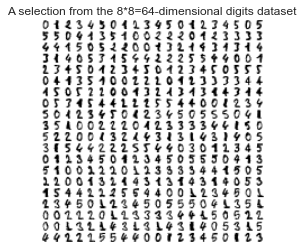

In [30]:
#直接从sklearn中load数据集
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
print "Dataset consist of %d samples with %d features each" % (n_samples, n_features)

# 绘制数字示意图
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
_ = plt.title('A selection from the 8*8=64-dimensional digits dataset')
plt.show()

我们总共有1083个训练样本，包含手写数字(0,1,2,3,4,5)，每个样本图片中的像素点平铺开都是64位，这个维度显然是没办法直接可视化的。下面我们基于scikit-learn的示例教程对特征用各种方法做降维处理，再可视化。

* 降维处理:随机投射

我们先看看，把数据随机投射到两个维度上的结果：

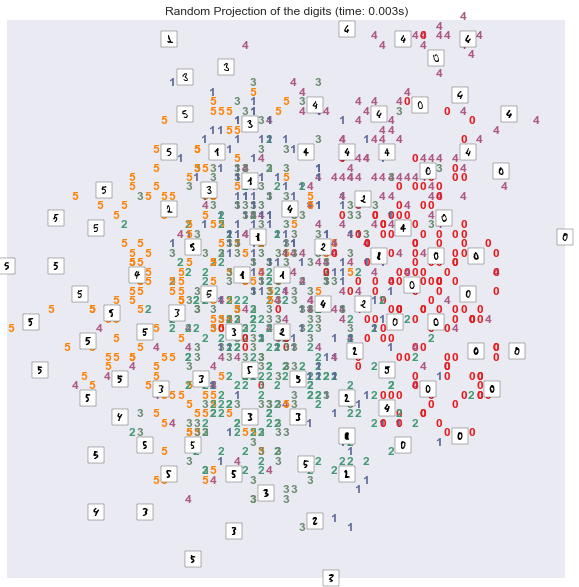

In [31]:
#import所需的package
import time
from sklearn import (manifold, decomposition, random_projection)
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)

#定义绘图函数
from matplotlib import offsetbox
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 12})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

#记录开始时间
start_time = time.time()
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits (time: %.3fs)" % (time.time() - start_time))

* PCA降维

在维度约减/降维领域有一个非常强大的算法叫做PCA(Principal Component Analysis，主成分分析)，它能将原始的绝大多数信息用维度远低于原始维度的几个主成分表示出来。PCA在我们现在的数据集上效果还不错，我们来看看用PCA对原始特征降维至2维后，原始样本在空间的分布状况：

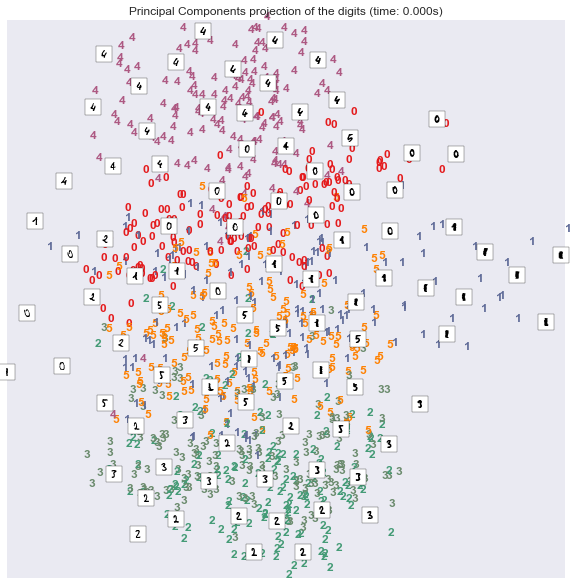

In [32]:
from sklearn import (manifold, decomposition, random_projection)
#TruncatedSVD 是 PCA的一种实现
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
#记录时间
start_time = time.time()
plot_embedding(X_pca,"Principal Components projection of the digits (time: %.3fs)" % (time.time() - start_time))

我们可以看出，效果还不错，不同的手写数字在2维平面上，显示出了区域集中性。即使它们之间有一定的重叠区域。

* 非线性的变换

如果我们用一些非线性的变换来做降维操作，从原始的64维降到2维空间，效果更好，比如这里我们用到一个技术叫做t-SNE，sklearn的manifold对其进行了实现：

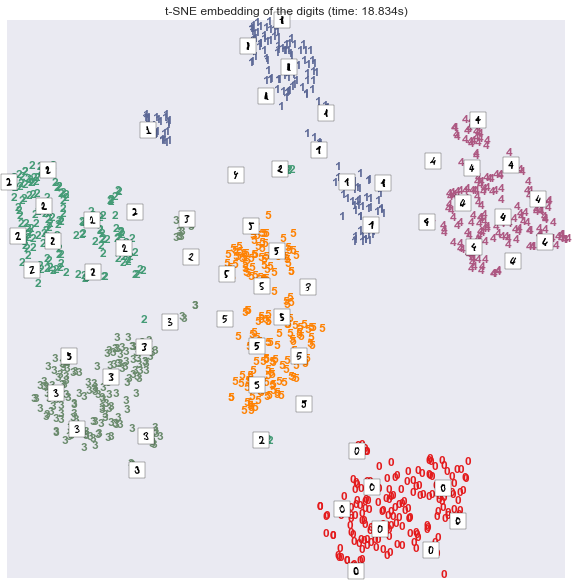

In [33]:
from sklearn import (manifold, decomposition, random_projection)
#降维
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
start_time = time.time()
X_tsne = tsne.fit_transform(X)
#绘图
plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time: %.3fs)" % (time.time() - start_time))

## 3.4 损失函数的选择
损失函数的选择对于问题的解决和优化，非常重要。我们先来看一眼各种不同的损失函数：

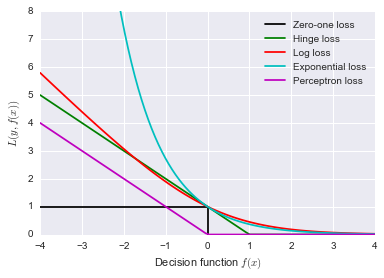

In [34]:
import numpy as np

# 改自http://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_loss_functions.html
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], 'k-',
         label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), 'g-',
         label="Hinge loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), 'r-',
         label="Log loss")
plt.plot(xx, np.exp(-xx), 'c-',
         label="Exponential loss")
plt.plot(xx, -np.minimum(xx, 0), 'm-',
         label="Perceptron loss")

plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel("$L(y, f(x))$")
plt.show()

不同的损失函数有不同的优缺点：

>* 0-1损失函数(zero-one loss)非常好理解，直接对应分类问题中判断错的个数。但是比较尴尬的是它是一个非凸函数，这意味着其实不是那么实用。
* hinge loss(SVM中使用到的)的健壮性相对较高(对于异常点/噪声不敏感)。但是它没有那么好的概率解释。
* log损失函数(log-loss)的结果能非常好地表征概率分布。因此在很多场景，尤其是多分类场景下，如果我们需要知道结果属于每个类别的置信度，那这个损失函数很适合。缺点是它的健壮性没有那么强，相对hinge loss会对噪声敏感一些。
* 多项式损失函数(exponential loss)(AdaBoost中用到的)对离群点/噪声非常非常敏感。但是它的形式对于boosting算法简单而有效。
* 感知损失(perceptron loss)可以看做是hinge loss的一个变种。hinge loss对于判定边界附近的点(正确端)惩罚力度很高。而perceptron loss，只要样本的判定类别结果是正确的，它就是满意的，而不管其离判定边界的距离。优点是比hinge loss简单，缺点是因为不是max-margin boundary，所以得到模型的泛化能力没有hinge loss强。


## 4. 总结

全文到此就结束了。先走马观花看了一遍机器学习的算法，
>* 给出了对应scikit-learn的『秘密武器』机器学习算法使用图谱，
* 从了解数据(可视化)、选择机器学习算法、
* 定位过/欠拟合及解决方法、
* 大量极的数据可视化和损失函数优缺点与选择

等方面介绍了实际机器学习问题中的一些思路和方法